In [2]:
from keras.datasets.mnist import load_data
import numpy as np
import matplotlib.pyplot as plt
import pylab as p

Using TensorFlow backend.


In [3]:
(train_digits, train_labels), (test_digits, test_labels) = load_data()

11493376/11490434 [==============================] - 2s 0us/step


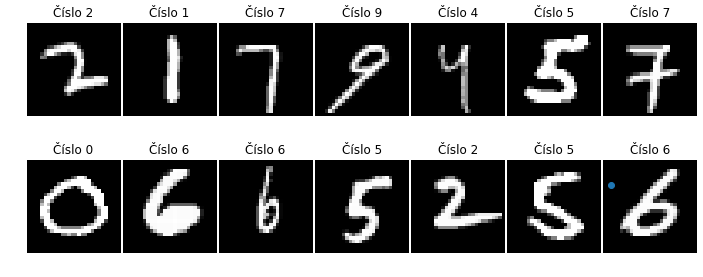

In [10]:
np.random.seed(9)

rand_14 = np.random.randint(0, train_digits.shape[0],14)
sample_digits = train_digits[rand_14]
sample_labels = train_labels[rand_14]

num_rows, num_cols = 2, 7
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(sample_digits[image_index], cmap='gray')
        ax[r,c].set_title('Číslo %d' % sample_labels[image_index])
plt.scatter(num_rows, num_cols)        
plt.show()
plt.close()

In [3]:
image_height = train_digits.shape[1]  
image_width = train_digits.shape[2]
num_channels = 1

In [4]:
train_data = np.reshape(train_digits, (train_digits.shape[0], image_height, image_width, num_channels))
test_data = np.reshape(test_digits, (test_digits.shape[0],image_height, image_width, num_channels))

train_data = train_data.astype('float32') / 255.
test_data = test_data.astype('float32') / 255.

from keras.utils import to_categorical
num_classes = 10
train_labels_cat = to_categorical(train_labels,num_classes)
test_labels_cat = to_categorical(test_labels,num_classes)
train_labels_cat.shape, test_labels_cat.shape

((60000, 10), (10000, 10))

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_model():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',
                     input_shape=(image_height, image_width, num_channels)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
__________

In [6]:
results = model.fit(train_data, train_labels_cat, 
                    epochs=15, batch_size=64,
                    validation_data=(test_data, test_labels_cat))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 103s 2ms/step - loss: 0.1699 - acc: 0.9470 - val_loss: 0.0474 - val_acc: 0.9860
Epoch 2/15
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0491 - acc: 0.9847 - val_loss: 0.0479 - val_acc: 0.9860
Epoch 3/15
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0345 - acc: 0.9889 - val_loss: 0.0323 - val_acc: 0.9898
Epoch 4/15
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0268 - acc: 0.9913 - val_loss: 0.0455 - val_acc: 0.9858
Epoch 5/15
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0211 - acc: 0.9932 - val_loss: 0.0251 - val_acc: 0.9917
Epoch 6/15
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0171 - acc: 0.9945 - val_loss: 0.0254 - val_acc: 0.9917
Epoch 7/15
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0139 - acc: 0.9955 - val_loss: 0.0257 - 

In [7]:
test_loss, test_accuracy = \
  model.evaluate(test_data, test_labels_cat, batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

10000/10000 [==============================] - 5s 483us/step
Test loss: 0.0311 accuracy: 0.9909


In [8]:
predictions = model.predict(test_data)
chyba = np.where((np.argmax(predictions, axis=1) != \
                        np.argmax(test_labels_cat,axis=1)))
(np.argmax(predictions, axis=1) != \
                        np.argmax(test_labels_cat,axis=1)).sum()

91

In [9]:
print(chyba)   

(array([ 321,  359,  583,  619,  646,  659,  829,  882,  947, 1014, 1039,
       1112, 1182, 1232, 1242, 1247, 1319, 1393, 1522, 1621, 1654, 1737,
       1790, 1901, 1982, 2130, 2135, 2182, 2280, 2414, 2447, 2462, 2597,
       2654, 2678, 2771, 2927, 2939, 2995, 3030, 3225, 3250, 3330, 3422,
       3520, 3534, 3558, 3599, 3727, 4078, 4163, 4176, 4384, 4504, 4536,
       4740, 4783, 4823, 4860, 4939, 5165, 5634, 5937, 5955, 5981, 5997,
       6172, 6555, 6560, 6571, 6576, 6597, 6625, 6651, 7216, 7849, 8094,
       8246, 8278, 8310, 8382, 8509, 9015, 9642, 9664, 9679, 9729, 9811,
       9839, 9847, 9850]),)


In [15]:
predikovane = np.argmax(predictions, axis=1)[chyba]
skutocne = np.argmax(test_labels_cat,axis=1)[chyba]
print("Predikované")
print(predikovane)
print("Skutočné")
print(skutocne)

Predikované
[7 4 7 8 1 7 8 4 9 5 1 6 8 4 9 5 9 3 9 6 7 8 7 4 5 9 1 3 5 4 9 8 3 1 9 9 7
 5 8 0 9 1 3 0 4 8 0 7 9 8 7 7 1 7 5 5 9 4 9 7 6 8 3 8 9 9 5 9 5 7 1 7 2 8
 6 9 8 9 2 1 2 8 2 7 7 1 6 8 7 7 8]
Skutočné
[2 9 2 1 2 2 4 9 8 6 7 4 6 9 4 9 8 5 7 0 2 5 2 9 6 4 6 1 3 9 4 2 5 6 4 4 3
 9 6 6 7 2 2 6 6 4 5 2 8 9 9 2 2 2 6 3 4 9 4 2 0 2 5 3 5 5 9 8 9 9 7 0 8 0
 0 3 2 3 0 2 0 1 7 9 2 6 5 2 2 2 0]


In [11]:
print(results.history['loss'])

[0.16989081470618644, 0.04908832485104601, 0.03452646141036724, 0.02679504335517995, 0.021147211468809594, 0.01707660634442388, 0.01391364328788671, 0.012190113975773178, 0.010422665476371185, 0.009115324581597816, 0.007455844599642781, 0.007582175417286392, 0.00749552636254507, 0.0065832178473578095, 0.006488771874994169]


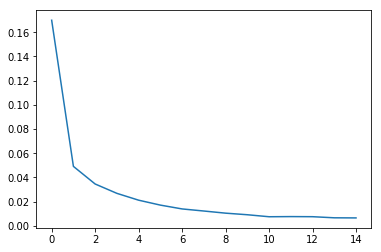

In [12]:
plt.plot(results.history['loss'])

In [13]:
print(results.history['acc'])

[0.9470333333333333, 0.9846666666666667, 0.9888666666666667, 0.9912833333333333, 0.9931666666666666, 0.9945166666666667, 0.9955333333333334, 0.99565, 0.9965, 0.997, 0.99775, 0.9976833333333334, 0.9975333333333334, 0.9976, 0.9981333333333333]


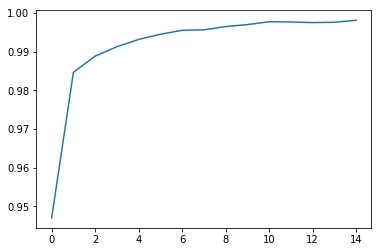

In [14]:
plt.plot(results.history['acc'])